## Anova test and Turkey test between vital economic region

### H0 : µ1= µ2 = µ3 = µ4 = µ5 = µ6 = µ7
### H1 : Tồn tại ít nhất một cặp khác nhau.
### Mức ý nghĩa α = 0.05

In [110]:
import pandas as pd 
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [111]:
my_data = pd.read_csv("C:/Users/ADMIN/BAOHUY/Phan_tich_du_lieu/unemployeed_area.csv")

In [112]:
my_data 

,Năm,Cả nước,Đồng bằng sông Hồng,Trung du và miền núi phía Bắc,Bắc Trung Bộ và duyên hải miền Trung,Tây Nguyên,Đông Nam Bộ,Đồng bằng sông Cửu Long
0,2018,2.19,1.97,1.05,2.70,1.05,2.63,2.71
1,2019,2.17,1.82,1.29,2.47,1.37,2.45,2.90
2,2020,2.48,2.05,1.06,3.16,1.66,3.23,2.82
3,2021,3.20,2.18,2.42,3.30,0.96,4.66,4.05
4,2022,2.34,1.93,2.10,2.59,0.67,2.88,2.76
5,2023,2.28,1.86,1.91,2.37,0.70,2.91,2.82


In [113]:
my_data[["Cả nước", "Đồng bằng sông Hồng", "Trung du và miền núi phía Bắc", "Bắc Trung Bộ và duyên hải miền Trung", "Tây Nguyên", "Đông Nam Bộ", "Đồng bằng sông Cửu Long"]].describe()

,Cả nước,Đồng bằng sông Hồng,Trung du và miền núi phía Bắc,Bắc Trung Bộ và duyên hải miền Trung,Tây Nguyên,Đông Nam Bộ,Đồng bằng sông Cửu Long
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2.443333,1.968333,1.638333,2.765000,1.068333,3.126667,3.010000
std,0.387333,0.131669,0.583075,0.379513,0.386648,0.796760,0.513498
min,2.170000,1.820000,1.050000,2.370000,0.670000,2.450000,2.710000
25%,2.212500,1.877500,1.117500,2.500000,0.765000,2.692500,2.775000
50%,2.310000,1.950000,1.600000,2.645000,1.005000,2.895000,2.820000
75%,2.445000,2.030000,2.052500,3.045000,1.290000,3.150000,2.880000
max,3.200000,2.180000,2.420000,3.300000,1.660000,4.660000,4.050000


In [114]:
from scipy.stats import f_oneway

In [115]:
f_stat, p_value = f_oneway(my_data["Cả nước"], my_data["Đồng bằng sông Hồng"], my_data["Trung du và miền núi phía Bắc"], my_data["Bắc Trung Bộ và duyên hải miền Trung"], my_data["Tây Nguyên"], my_data["Đông Nam Bộ"], my_data["Đồng bằng sông Cửu Long"])

In [116]:
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 14.37
P-value: 0.0000


In [117]:
if p_value < 0.05:
    print("Bác bỏ H0. Có sự khác biệt ý nghĩa giữa các nhóm.")
else:
    print("Không bác bỏ H0. Không có sự khác biệt ý nghĩa giữa các nhóm.")

Bác bỏ H0. Có sự khác biệt ý nghĩa giữa các nhóm.


In [118]:
tukey_data = pd.read_excel("C:/Users/ADMIN/BAOHUY/Phan_tich_du_lieu/unemployee_area_tukey.xlsx")

In [119]:
tukey_data

,unemployee_rate,area
0,2.19,1
1,2.17,1
2,2.48,1
3,3.20,1
4,2.34,1
5,2.28,1
6,1.97,2
7,1.82,2
8,2.05,2
9,2.18,2


In [120]:
tukey = pairwise_tukeyhsd(endog=tukey_data['unemployee_rate'], groups=tukey_data['area'], alpha=0.05)

In [121]:
tukey

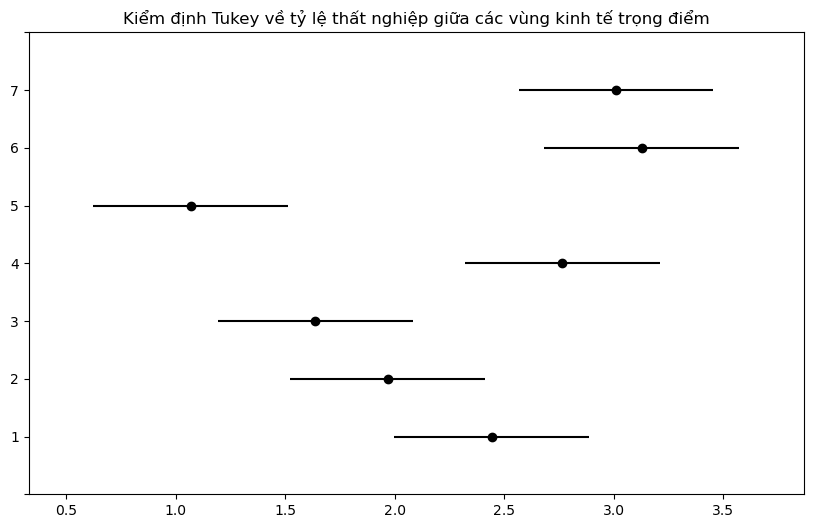

In [122]:
tukey.plot_simultaneous()
import matplotlib.pyplot as plt
plt.title('Kiểm định Tukey về tỷ lệ thất nghiệp giữa các vùng kinh tế trọng điểm')
plt.show()

### Dựa vào đồ thị thì ta chấp nhận các cặp bằng nhau là cặp 1 vs 4, 2 vs 3, 4 vs 7, 6 vs 7 có trung bình giống nhau. Các cặp còn lại khác nhau về trung bình 